In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
S03_path = 'C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/process_data/S03_final_df.csv'

S03_df = pd.read_csv(S03_path, index_col=False, parse_dates=['DateTime'])

# Set 'DateTime' column as the index
S03_df.set_index('DateTime', inplace=True)

# Display the DataFrame
print(S03_df)

                    ID_instance    hrv_vlf      hrv_lf       hrv_hf  \
DateTime                                                              
2023-09-07 17:03:12       S03_1  15.567183   54.850747  1209.265522   
2023-09-07 17:03:13       S03_1  23.123671   86.599515  1141.574503   
2023-09-07 17:03:14       S03_1  32.900539  103.494674  1110.168456   
2023-09-07 17:03:15       S03_1   4.806803   91.454847  1080.598231   
2023-09-07 17:03:16       S03_1   3.098080  105.317494  1056.527536   
...                         ...        ...         ...          ...   
2023-09-28 17:19:57      S03_14  18.775377  560.784509  1417.648178   
2023-09-28 17:19:58      S03_14  18.775377  560.784509  1417.648178   
2023-09-28 17:19:59      S03_14  18.775377  560.784509  1417.648178   
2023-09-28 17:20:00      S03_14  18.775377  560.784509  1417.648178   
2023-09-28 17:20:01      S03_14  18.775377  560.784509  1417.648178   

                      hrv_sdnn  hrv_rmssd  hrv_mean_nni  hrv_median_nni  \
D

In [3]:
# Group by 'id_instance' and calculate time duration
time_duration = S03_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S03_1     87.57
S03_10    18.40
S03_11    29.38
S03_12    36.45
S03_13    61.13
S03_14    52.82
S03_2     46.00
S03_3     34.20
S03_4     36.62
S03_5     43.23
S03_6     42.52
S03_7     61.43
S03_8     25.33
S03_9     55.03
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_11516\1495514423.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S03_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [4]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S03_df.drop(S03_df[S03_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [5]:
S03_df.isnull().sum()

ID_instance          13
hrv_vlf               0
hrv_lf                0
hrv_hf                0
hrv_sdnn              0
hrv_rmssd             0
hrv_mean_nni          0
hrv_median_nni        0
hrv_range_nni         0
hrv_entropy           0
eda_tonic_mean        0
eda_tonic_std         0
eda_tonic_sum         0
eda_tonic_energy      0
eda_phasic_mean       0
eda_phasic_std        0
eda_phasic_sum        0
eda_phasic_energy     0
acc_acc_x_min         0
acc_acc_y_min         0
acc_acc_z_min         0
acc_l2_min            0
acc_acc_x_max         0
acc_acc_y_max         0
acc_acc_z_max         0
acc_l2_max            0
acc_acc_x_ptp         0
acc_acc_y_ptp         0
acc_acc_z_ptp         0
acc_l2_ptp            0
Temp(C)_N1            0
RH(%)_N1              0
Dewpoint(C)_N1        0
Temp(C)_N2            0
RH(%)_N2              0
Dewpoint(C)_N2        0
Temp(C)_N3            0
RH(%)_N3              0
Dewpoint(C)_N3        0
Temp(C)_N4            0
RH(%)_N4              0
Dewpoint(C)_N4  

In [6]:
S03_df.dropna(subset=['ID_instance'], inplace=True)

In [7]:
S03_df['ID_instance'].unique()

array(['S03_2', 'S03_3', 'S03_4', 'S03_5', 'S03_6', 'S03_8', 'S03_9',
       'S03_10', 'S03_11', 'S03_12', 'S03_14'], dtype=object)

In [11]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S03_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S03_df.columns[30:42] 

# Calculating correlation matrix
correlation_matrix = S03_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,0.100142,0.107012,0.080054,0.121572,0.074644,0.055043,0.102540,0.109996,0.064637,-0.068195,0.060905,-0.045365
hrv_lf,0.073568,-0.146808,0.020759,0.115001,-0.167470,0.001925,0.057829,-0.154107,0.008173,0.051679,-0.046741,0.076409
hrv_hf,-0.239695,-0.682188,-0.200795,-0.148489,-0.678004,-0.206745,-0.232487,-0.692954,-0.207932,0.353341,-0.359480,0.364113
hrv_sdnn,-0.208458,-0.566673,-0.103436,-0.131742,-0.560468,-0.107013,-0.208836,-0.580809,-0.108047,0.194339,-0.192471,0.205159
hrv_rmssd,-0.255553,-0.562775,-0.113887,-0.180735,-0.559292,-0.120373,-0.253615,-0.578299,-0.121420,0.174457,-0.172925,0.188602
hrv_mean_nni,-0.251001,-0.160818,0.059271,-0.290662,-0.130354,0.080641,-0.230380,-0.169908,0.073153,-0.081893,0.098110,-0.097790
hrv_median_nni,-0.292767,-0.191104,0.000678,-0.325673,-0.158061,0.023488,-0.274140,-0.202890,0.015215,-0.046780,0.065551,-0.062131
hrv_range_nni,-0.214504,-0.595067,-0.147858,-0.134375,-0.579625,-0.141675,-0.221172,-0.608571,-0.143867,0.235134,-0.222947,0.241239
hrv_entropy,0.238328,0.240683,-0.128989,0.258566,0.217328,-0.143164,0.218741,0.250748,-0.137909,0.056466,-0.068644,0.064329
eda_tonic_mean,-0.065757,0.348523,0.236294,-0.215219,0.345903,0.216455,-0.061743,0.302020,0.212860,-0.399874,0.385580,-0.383211


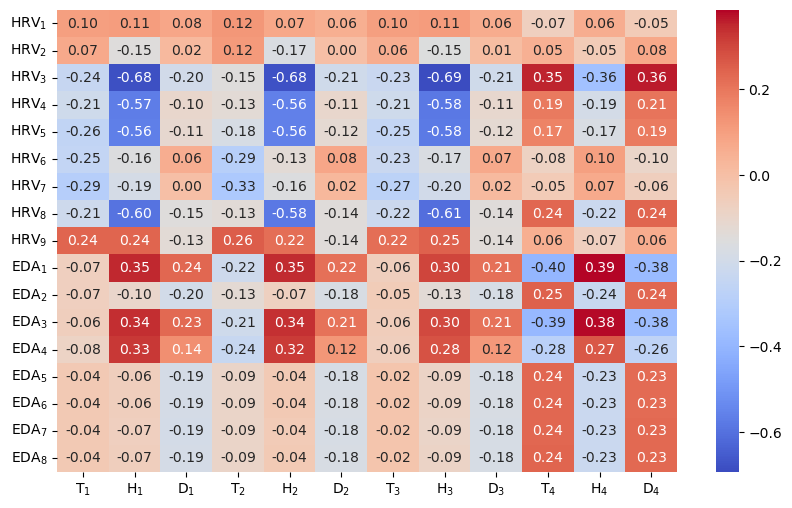

In [13]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S03')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/viz/'
plt.savefig(outpath+'S03_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S03_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


In [14]:
# Drop columns starting with 'acc_'
data = S03_df.filter(regex='^(?!acc_)')

In [10]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = data[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: data[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: data[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [data['Temp(C)_N1'].quantile(0.30), data['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [data['RH(%)_N1'].quantile(0.30), data['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return -1  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
data['lambda'] = data.apply(comfort_label, axis=1)
label_counts = data['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)


Variables considered for the comfort function:
HRV Variable: hrv_hf
EDA Variable: eda_tonic_mean
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
 0    84.184847
-1    15.815153
Name: proportion, dtype: float64
